## Logistic Regression

### Load Dataset

In [ ]:
# Import Libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [ ]:
# Download Data from Project GitHub
!wget 'https://raw.githubusercontent.com/r0b0pp1/CS5228_emotion_in_conversation/main/data/processed/processed_text_balanced_w_punct.json'

In [ ]:
# data loading
import json
import pandas as pd

with open('processed_text_balanced_w_punct.json','r+') as js_file:
    jsobj = json.load(js_file)

df = pd.DataFrame(jsobj)

In [ ]:
unique_values = df['split'].unique()
print("Unique values in the 'split' column:", unique_values)

Unique values in the 'split' column: ['dev' 'test' 'train']


In [ ]:
unique_values = df['y'].unique()
print("Unique values in the 'y' column:", unique_values)

Unique values in the 'y' column: ['sadness' 'surprise' 'neutral' 'joy' 'anger' 'disgust' 'fear']


### Binary Classification: Neutral vs Anger

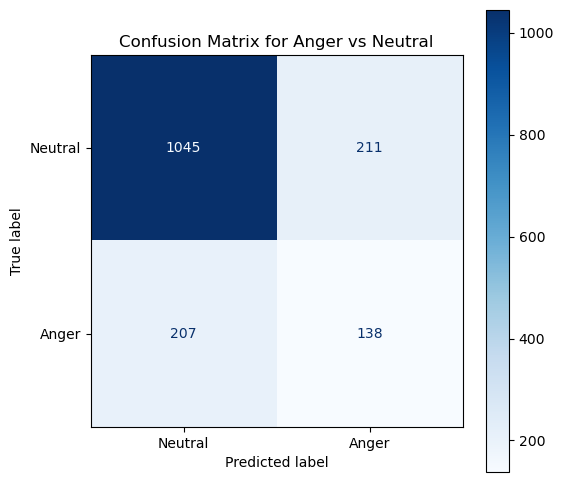

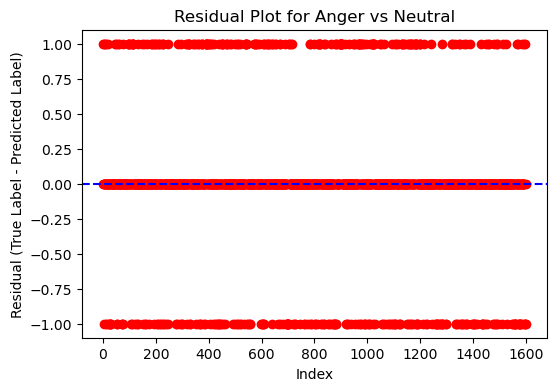

Anger vs Neutral: F1-score = 0.3976945244956772
Top 5 Important Features for Anger vs Neutral:
    Feature  Importance
794    stop    2.174520
800  stupid    2.155443
543      my    2.021460
592      ow    1.865299
306     god    1.851056




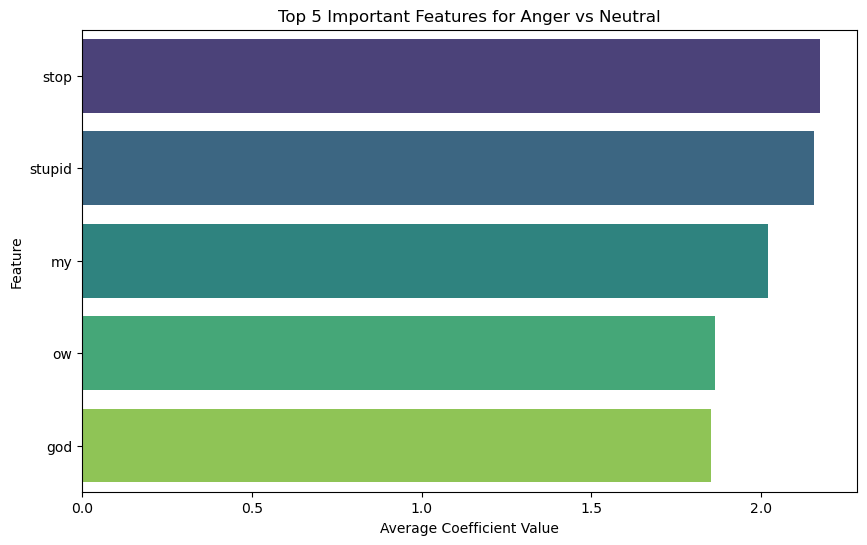

In [ ]:
# Set binary labels: 1 for 'anger', 0 for 'neutral'
df['label'] = np.where(df['y'] == 'anger', 1, np.where(df['y'] == 'neutral', 0, np.nan))

# Filter out rows that are not 'anger' or 'neutral'
filtered_df = df.dropna(subset=['label'])

# Split data into training (train + dev) and testing sets based on 'split'
train_dev_df = filtered_df[filtered_df['split'].isin(['train', 'dev'])]
test_df = filtered_df[filtered_df['split'] == 'test']

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Extract features
X_train_dev = vectorizer.fit_transform(train_dev_df['clean']).toarray()
y_train_dev = train_dev_df['label'].values
X_test = vectorizer.transform(test_df['clean']).toarray()
y_test = test_df['label'].values

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_dev, y_train_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score to evaluate the model
f1 = f1_score(y_test, y_pred)

# Plot the confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Anger'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Anger vs Neutral')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(range(len(residuals)), residuals, color='red')
plt.title('Residual Plot for Anger vs Neutral')
plt.xlabel('Index')
plt.ylabel('Residual (True Label - Predicted Label)')
plt.axhline(0, linestyle='--', color='blue')
plt.show()

# Display the F1-score
print("Anger vs Neutral: F1-score =", f1)

# Extract feature importance (coefficient of the features)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance_data = dict(zip(feature_names, coefficients))

# Preparing the feature importance DataFrame
features = []
importances = []
for feature, importance in feature_importance_data.items():
    features.append(feature)
    importances.append(importance)

df_vis = pd.DataFrame({'Feature': features, 'Importance': importances})
df_vis = df_vis.sort_values(by='Importance', key=abs, ascending=False).head(5)

# Print the top 5 important features and their coefficients
print("Top 5 Important Features for Anger vs Neutral:")
print(df_vis)
print("\n")

# Visualization of the top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_vis, x='Importance', y='Feature', orient='h', palette='viridis')
plt.title('Top 5 Important Features for Anger vs Neutral')
plt.xlabel('Average Coefficient Value')
plt.show()

### Binary Classification: Neutral vs Sadness

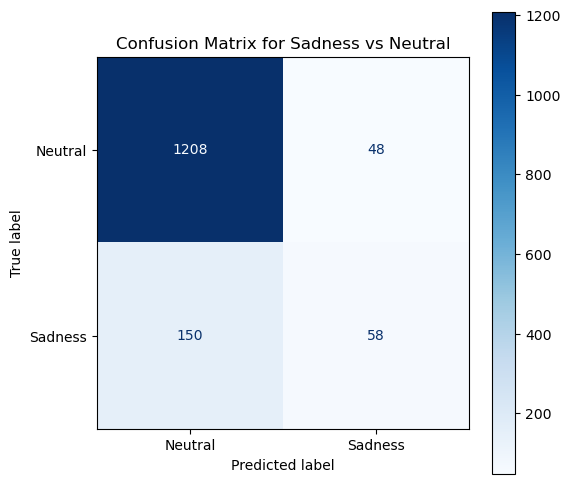

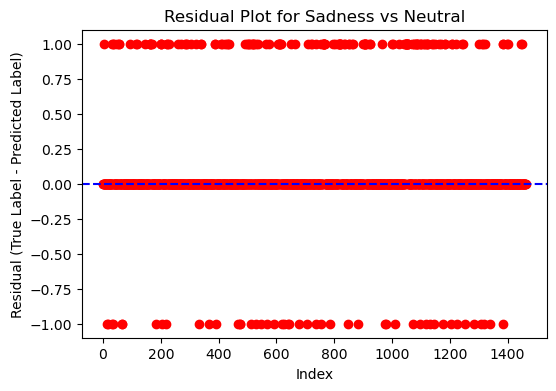

Sadness vs Neutral: F1-score = 0.3694267515923567
Top 5 Important Features for Sadness vs Neutral:
    Feature  Importance
750   sorry    3.698674
258     god    2.418544
307     hey   -2.043078
605  please    1.832748
782  stupid    1.720614




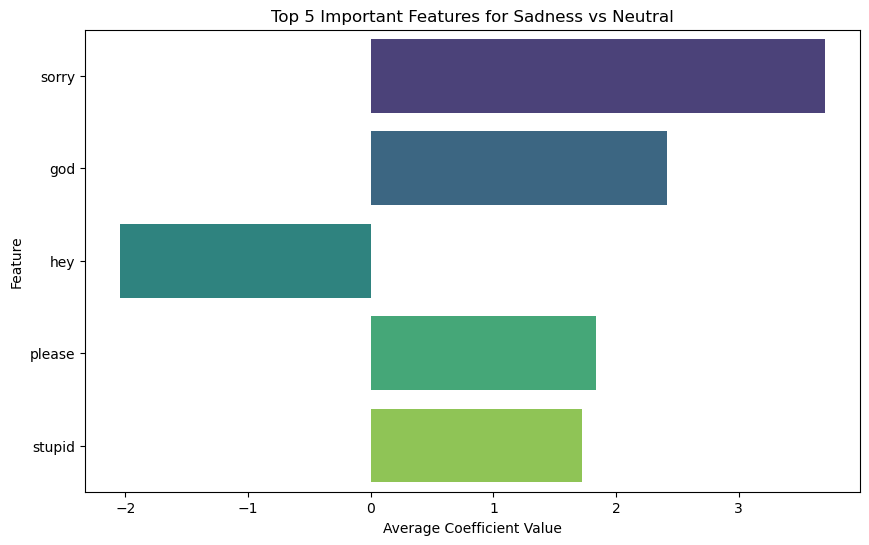

In [ ]:
# Set binary labels: 1 for 'sadness', 0 for 'neutral'
df['label'] = np.where(df['y'] == 'sadness', 1, np.where(df['y'] == 'neutral', 0, np.nan))

# Filter out rows that are not 'anger' or 'neutral'
filtered_df = df.dropna(subset=['label'])

# Split data into training (train + dev) and testing sets based on 'split'
train_dev_df = filtered_df[filtered_df['split'].isin(['train', 'dev'])]
test_df = filtered_df[filtered_df['split'] == 'test']

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Extract features
X_train_dev = vectorizer.fit_transform(train_dev_df['clean']).toarray()
y_train_dev = train_dev_df['label'].values
X_test = vectorizer.transform(test_df['clean']).toarray()
y_test = test_df['label'].values

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_dev, y_train_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score to evaluate the model
f1 = f1_score(y_test, y_pred)

# Plot the confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Sadness'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Sadness vs Neutral')
plt.show()


# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(range(len(residuals)), residuals, color='red')
plt.title('Residual Plot for Sadness vs Neutral')
plt.xlabel('Index')
plt.ylabel('Residual (True Label - Predicted Label)')
plt.axhline(0, linestyle='--', color='blue')
plt.show()

# Display the F1-score
print("Sadness vs Neutral: F1-score =", f1)

# Extract feature importance (coefficient of the features)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance_data = dict(zip(feature_names, coefficients))

# Preparing the feature importance DataFrame
features = []
importances = []
for feature, importance in feature_importance_data.items():
    features.append(feature)
    importances.append(importance)

df_vis = pd.DataFrame({'Feature': features, 'Importance': importances})
df_vis = df_vis.sort_values(by='Importance', key=abs, ascending=False).head(5)

# Print the top 5 important features and their coefficients
print("Top 5 Important Features for Sadness vs Neutral:")
print(df_vis)
print("\n")

# Visualization of the top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_vis, x='Importance', y='Feature', orient='h', palette='viridis')
plt.title('Top 5 Important Features for Sadness vs Neutral')
plt.xlabel('Average Coefficient Value')
plt.show()




### Binary Classification: Neutral vs Joy

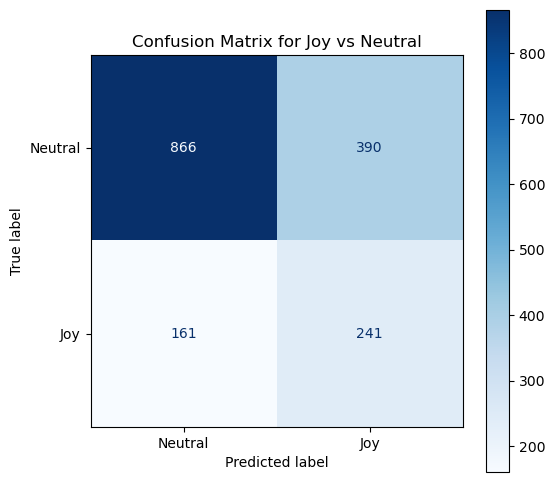

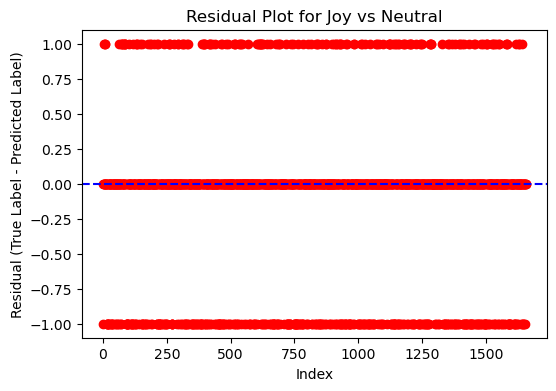

Joy vs Neutral: F1-score = 0.4666021297192643
Top 5 Important Features for Joy vs Neutral:
     Feature  Importance
354    great    3.507483
514     love    3.097236
619      ooh    2.171277
342      god    2.103349
32   amazing    2.059188




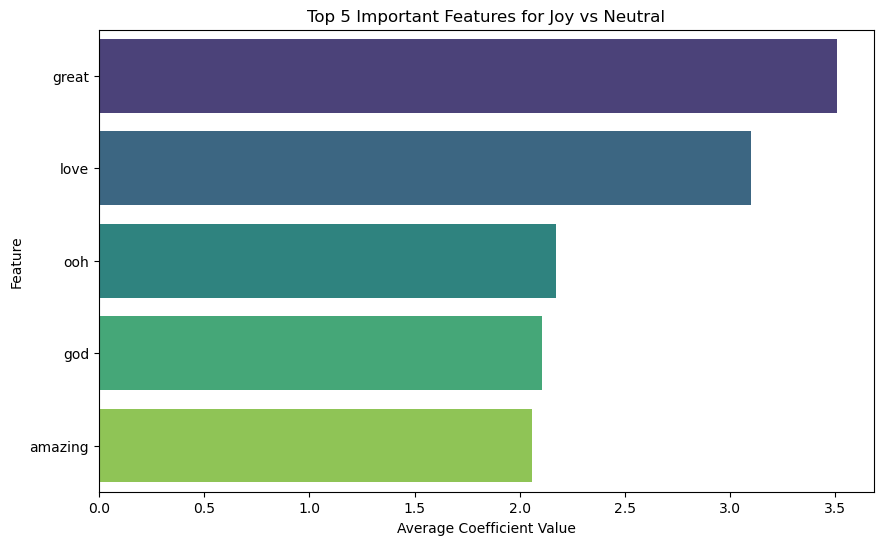

In [ ]:
# Set binary labels: 1 for 'joy', 0 for 'neutral'
df['label'] = np.where(df['y'] == 'joy', 1, np.where(df['y'] == 'neutral', 0, np.nan))

# Filter out rows that are not 'anger' or 'neutral'
filtered_df = df.dropna(subset=['label'])

# Split data into training (train + dev) and testing sets based on 'split'
train_dev_df = filtered_df[filtered_df['split'].isin(['train', 'dev'])]
test_df = filtered_df[filtered_df['split'] == 'test']

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Extract features
X_train_dev = vectorizer.fit_transform(train_dev_df['clean']).toarray()
y_train_dev = train_dev_df['label'].values
X_test = vectorizer.transform(test_df['clean']).toarray()
y_test = test_df['label'].values

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_dev, y_train_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score to evaluate the model
f1 = f1_score(y_test, y_pred)

# Plot the confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Joy'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Joy vs Neutral')
plt.show()


# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(range(len(residuals)), residuals, color='red')
plt.title('Residual Plot for Joy vs Neutral')
plt.xlabel('Index')
plt.ylabel('Residual (True Label - Predicted Label)')
plt.axhline(0, linestyle='--', color='blue')
plt.show()

# Display the F1-score
print("Joy vs Neutral: F1-score =", f1)

# Extract feature importance (coefficient of the features)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance_data = dict(zip(feature_names, coefficients))

# Preparing the feature importance DataFrame
features = []
importances = []
for feature, importance in feature_importance_data.items():
    features.append(feature)
    importances.append(importance)

df_vis = pd.DataFrame({'Feature': features, 'Importance': importances})
df_vis = df_vis.sort_values(by='Importance', key=abs, ascending=False).head(5)

# Print the top 5 important features and their coefficients
print("Top 5 Important Features for Joy vs Neutral:")
print(df_vis)
print("\n")

# Visualization of the top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_vis, x='Importance', y='Feature', orient='h', palette='viridis')
plt.title('Top 5 Important Features for Joy vs Neutral')
plt.xlabel('Average Coefficient Value')
plt.show()


### Binary Classification: Neutral vs Surprise

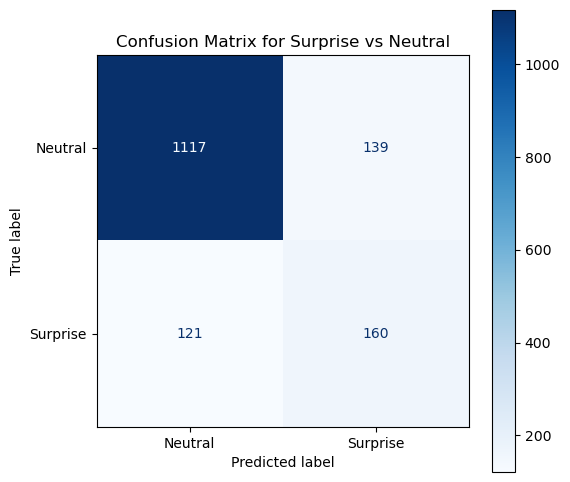

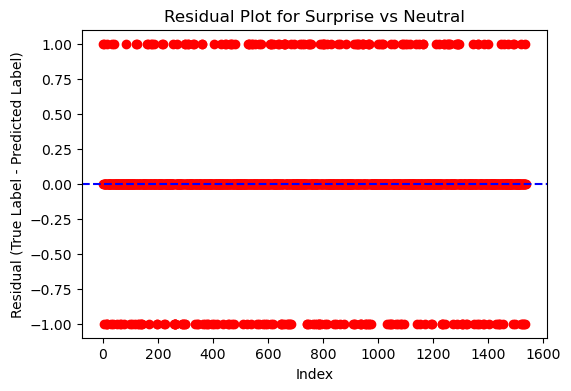

Surprise vs Neutral: F1-score = 0.5517241379310346
Top 5 Important Features for Surprise vs Neutral:
     Feature  Importance
977      wow    4.301337
320      god    3.720712
951     whoa    3.114074
688   really    2.801519
107  believe    2.437281




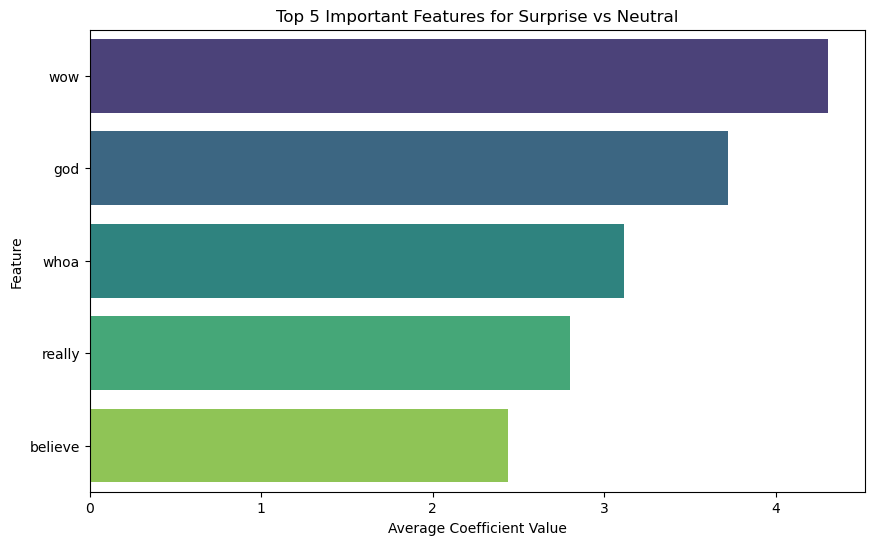

In [ ]:
# Set binary labels: 1 for 'surprise', 0 for 'neutral'
df['label'] = np.where(df['y'] == 'surprise', 1, np.where(df['y'] == 'neutral', 0, np.nan))

# Filter out rows that are not 'surprise' or 'neutral'
filtered_df = df.dropna(subset=['label'])

# Split data into training (train + dev) and testing sets based on 'split'
train_dev_df = filtered_df[filtered_df['split'].isin(['train', 'dev'])]
test_df = filtered_df[filtered_df['split'] == 'test']

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Extract features
X_train_dev = vectorizer.fit_transform(train_dev_df['clean']).toarray()
y_train_dev = train_dev_df['label'].values
X_test = vectorizer.transform(test_df['clean']).toarray()
y_test = test_df['label'].values

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_dev, y_train_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score to evaluate the model
f1 = f1_score(y_test, y_pred)

# Plot the confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Surprise'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Surprise vs Neutral')
plt.show()


# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(range(len(residuals)), residuals, color='red')
plt.title('Residual Plot for Surprise vs Neutral')
plt.xlabel('Index')
plt.ylabel('Residual (True Label - Predicted Label)')
plt.axhline(0, linestyle='--', color='blue')
plt.show()

# Display the F1-score
print("Surprise vs Neutral: F1-score =", f1)

# Extract feature importance (coefficient of the features)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance_data = dict(zip(feature_names, coefficients))

# Preparing the feature importance DataFrame
features = []
importances = []
for feature, importance in feature_importance_data.items():
    features.append(feature)
    importances.append(importance)

df_vis = pd.DataFrame({'Feature': features, 'Importance': importances})
df_vis = df_vis.sort_values(by='Importance', key=abs, ascending=False).head(5)

# Print the top 5 important features and their coefficients
print("Top 5 Important Features for Surprise vs Neutral:")
print(df_vis)
print("\n")

# Visualization of the top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_vis, x='Importance', y='Feature', orient='h', palette='viridis')
plt.title('Top 5 Important Features for Surprise vs Neutral')
plt.xlabel('Average Coefficient Value')
plt.show()

### Binary Classification: Neutral vs Disgust

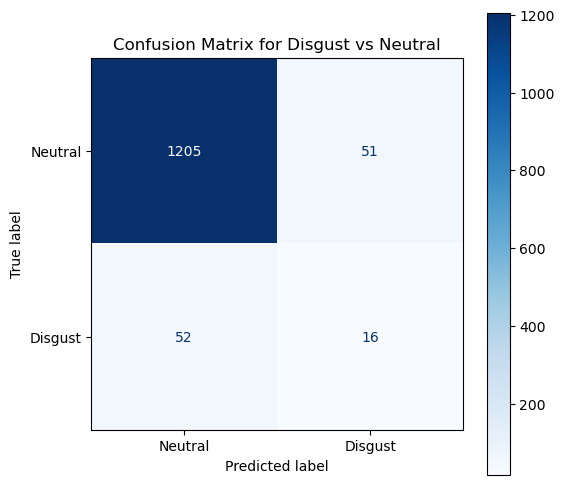

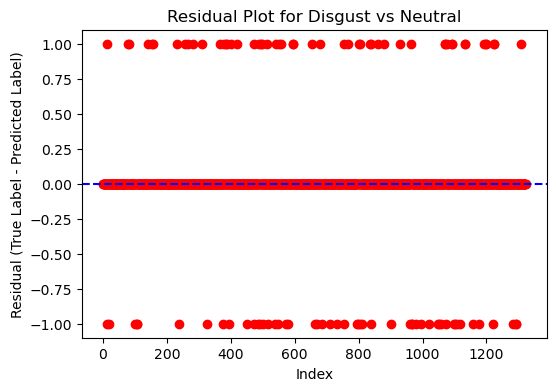

Disgust vs Neutral: F1-score = 0.23703703703703705
Top 5 Important Features for Disgust vs Neutral:
    Feature  Importance
881     ugh    3.309660
326     god    3.186158
361    hate    3.081481
939   weird    2.652237
654  please    2.565735




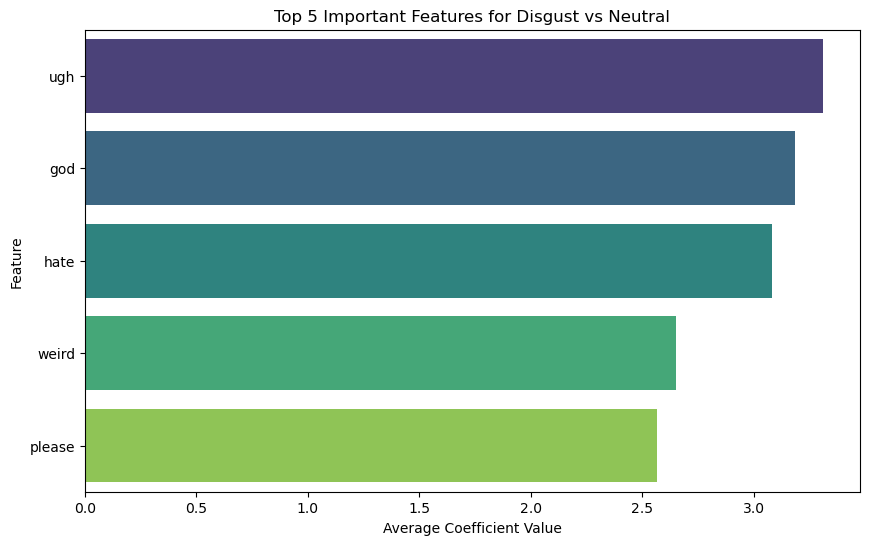

In [ ]:
# Set binary labels: 1 for 'disgust', 0 for 'neutral'
df['label'] = np.where(df['y'] == 'disgust', 1, np.where(df['y'] == 'neutral', 0, np.nan))

# Filter out rows that are not 'disgust' or 'neutral'
filtered_df = df.dropna(subset=['label'])

# Split data into training (train + dev) and testing sets based on 'split'
train_dev_df = filtered_df[filtered_df['split'].isin(['train', 'dev'])]
test_df = filtered_df[filtered_df['split'] == 'test']

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Extract features
X_train_dev = vectorizer.fit_transform(train_dev_df['clean']).toarray()
y_train_dev = train_dev_df['label'].values
X_test = vectorizer.transform(test_df['clean']).toarray()
y_test = test_df['label'].values

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_dev, y_train_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score to evaluate the model
f1 = f1_score(y_test, y_pred)

# Plot the confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Disgust'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Disgust vs Neutral')
plt.show()


# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(range(len(residuals)), residuals, color='red')
plt.title('Residual Plot for Disgust vs Neutral')
plt.xlabel('Index')
plt.ylabel('Residual (True Label - Predicted Label)')
plt.axhline(0, linestyle='--', color='blue')
plt.show()

# Display the F1-score
print("Disgust vs Neutral: F1-score =", f1)

# Extract feature importance (coefficient of the features)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance_data = dict(zip(feature_names, coefficients))

# Preparing the feature importance DataFrame
features = []
importances = []
for feature, importance in feature_importance_data.items():
    features.append(feature)
    importances.append(importance)

df_vis = pd.DataFrame({'Feature': features, 'Importance': importances})
df_vis = df_vis.sort_values(by='Importance', key=abs, ascending=False).head(5)

# Print the top 5 important features and their coefficients
print("Top 5 Important Features for Disgust vs Neutral:")
print(df_vis)
print("\n")

# Visualization of the top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_vis, x='Importance', y='Feature', orient='h', palette='viridis')
plt.title('Top 5 Important Features for Disgust vs Neutral')
plt.xlabel('Average Coefficient Value')
plt.show()


### Binary Classification: Neutral vs Fear

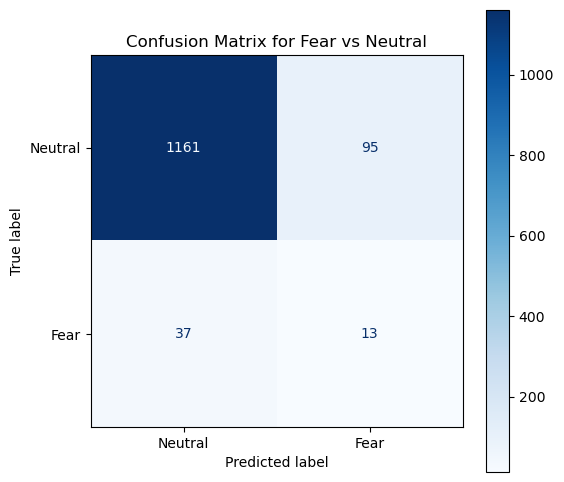

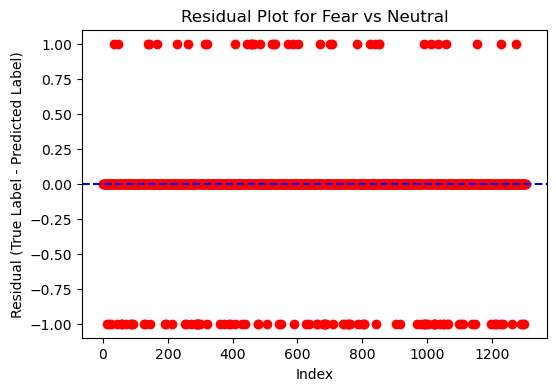

Fear vs Neutral: F1-score = 0.16455696202531644
Top 5 Important Features for Fear vs Neutral:
       Feature  Importance
663     please    3.897403
738     scared    3.096693
338        god    2.885287
229        don    2.803796
788  something    2.322462




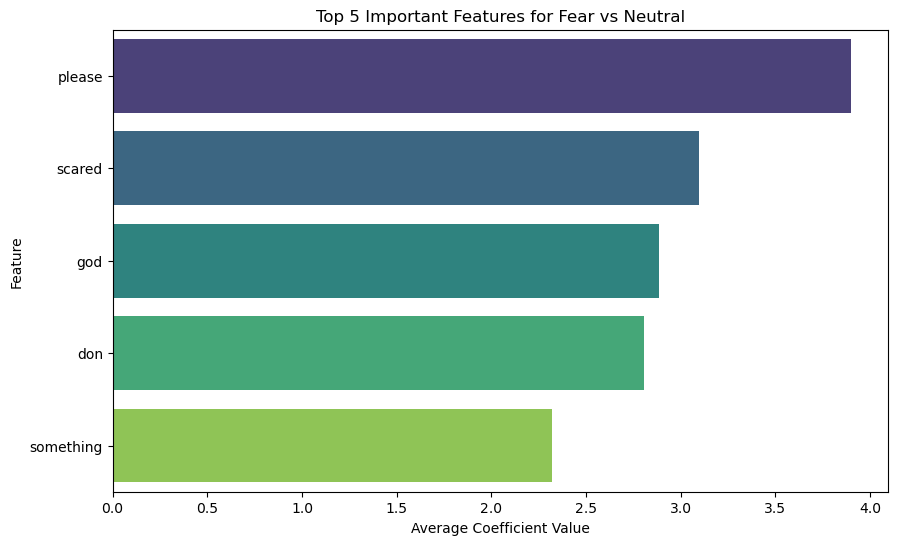

In [ ]:
# Set binary labels: 1 for 'fear', 0 for 'neutral'
df['label'] = np.where(df['y'] == 'fear', 1, np.where(df['y'] == 'neutral', 0, np.nan))

# Filter out rows that are not 'fear' or 'neutral'
filtered_df = df.dropna(subset=['label'])

# Split data into training (train + dev) and testing sets based on 'split'
train_dev_df = filtered_df[filtered_df['split'].isin(['train', 'dev'])]
test_df = filtered_df[filtered_df['split'] == 'test']

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Extract features
X_train_dev = vectorizer.fit_transform(train_dev_df['clean']).toarray()
y_train_dev = train_dev_df['label'].values
X_test = vectorizer.transform(test_df['clean']).toarray()
y_test = test_df['label'].values

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_dev, y_train_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score to evaluate the model
f1 = f1_score(y_test, y_pred)

# Plot the confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral', 'Fear'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Fear vs Neutral')
plt.show()


# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(range(len(residuals)), residuals, color='red')
plt.title('Residual Plot for Fear vs Neutral')
plt.xlabel('Index')
plt.ylabel('Residual (True Label - Predicted Label)')
plt.axhline(0, linestyle='--', color='blue')
plt.show()

# Display the F1-score
print("Fear vs Neutral: F1-score =", f1)

# Extract feature importance (coefficient of the features)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
feature_importance_data = dict(zip(feature_names, coefficients))

# Preparing the feature importance DataFrame
features = []
importances = []
for feature, importance in feature_importance_data.items():
    features.append(feature)
    importances.append(importance)

df_vis = pd.DataFrame({'Feature': features, 'Importance': importances})
df_vis = df_vis.sort_values(by='Importance', key=abs, ascending=False).head(5)

# Print the top 5 important features and their coefficients
print("Top 5 Important Features for Fear vs Neutral:")
print(df_vis)
print("\n")

# Visualization of the top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=df_vis, x='Importance', y='Feature', orient='h', palette='viridis')
plt.title('Top 5 Important Features for Fear vs Neutral')
plt.xlabel('Average Coefficient Value')
plt.show()
